# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt


# Plot Examples
## Normal Density

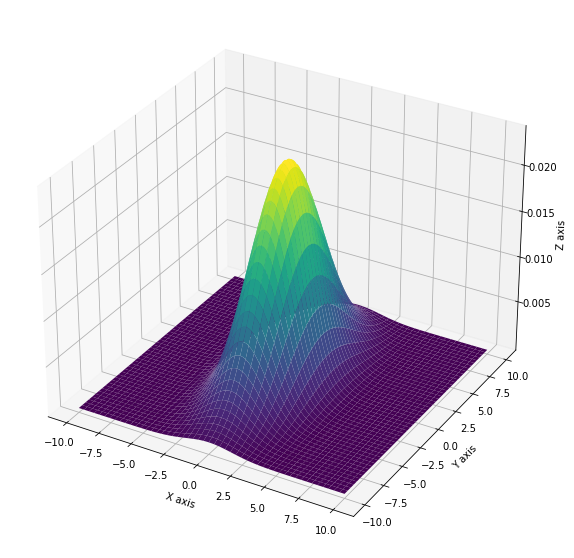

In [2]:

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

covariance = 0

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, covariance], [covariance, variance_y]])

#Make a 3D plot
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

...load market data for plots below

In [3]:
import pandas as pd

df_market_data = pd.read_excel('MarketData.xlsx').drop('Unnamed: 0', axis=1).set_index('as_of_date')
df_market_data.head()

,APPL,S&P500
as_of_date,,
2020-01-02,75.087502,3257.850098
2020-01-03,74.357498,3234.850098
2020-01-06,74.949997,3246.280029
2020-01-07,74.597504,3237.179932
2020-01-08,75.797501,3253.050049


## line plot
### multple axis

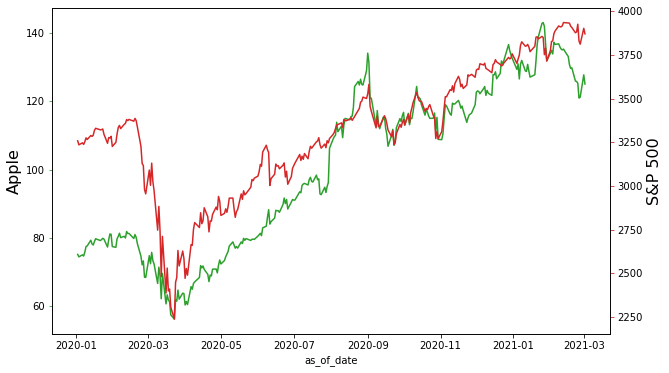

In [4]:
# Line Plot
import seaborn as sns

#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'

# axis 1 
ax1.set_ylabel('Apple', fontsize=16)
ax1 = sns.lineplot(x='as_of_date', y='APPL', data = df_market_data, sort=False, color=color)
ax1.tick_params(axis='y', color=color)

#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

# axis 2
ax2.set_ylabel('S&P 500', fontsize=16)
ax2 = sns.lineplot(x='as_of_date', y='S&P500', data = df_market_data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

#show plot
plt.show()

## heatmap

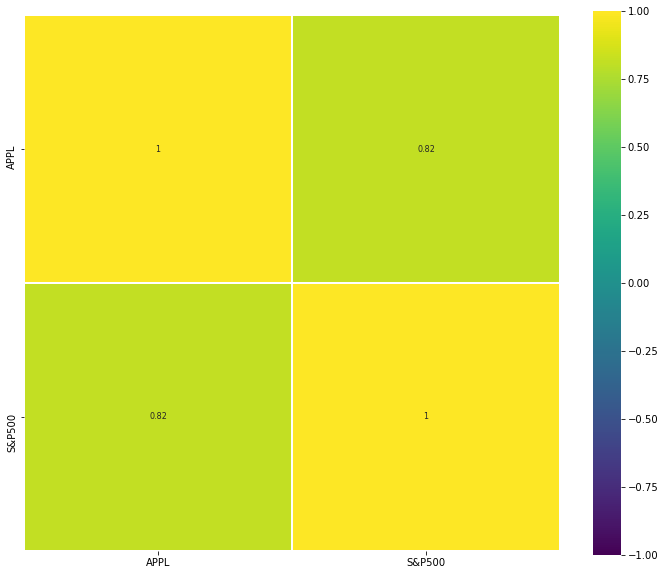

In [5]:
# Return relationship
def log_return(df):
    return np.log(df / df.shift(1))

def arithmetic_returns(df):
    return df/df.shift(1) - 1

df_return = log_return(df_market_data)

df_corr = df_return.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(df_corr[(df_corr >= 0.5) | (df_corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## regplot

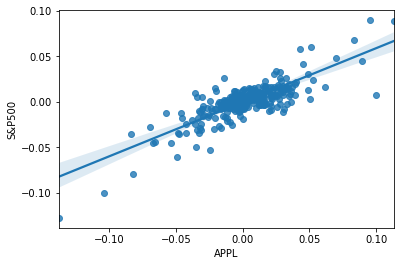

In [6]:
# Return relationship
sns.regplot(x='APPL',y='S&P500', data=df_return);

## Credit
### bond pricing & convexity

In [1]:
from utils.simple_FI import Bond

In [2]:
Bond(nominal=1000, coupon=50, price=None, full_years_left=4, ytm=0.04).get_cashflow_profile()

KeyError: 4

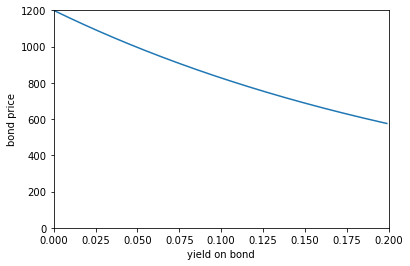

In [9]:
# construct ytm axis (x) and price (y) of bond
x = np.arange(0.0, 0.20, 0.001)
y = [Bond(nominal=1000, coupon=50, price=None, maturity=4, ytm=i).get_price() for i in x]

# plot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='yield on bond', ylabel='bond price')

plt.xlim([0, 0.20])
plt.ylim([0, 1200])

plt.show()


TODO:
- Bond Portfolio Simulation Performance
- Bei gleich bleibender Yield und sinkender Duration - was ist der Preis?